## **Prediction using Supervised ML**
This is a part of GRIPS MAY2021 Internship Program

Data set available on http://bit.ly/w-data
### Basic Linear Regression to predict score if a student studies for 9.25 hrs/ day

---
# By *Adarssh P N* 


In [1]:
#importing the required libraries

import pandas as pd #used for CSV
import numpy as np
import matplotlib.pyplot as plt  
%matplotlib inline

In [3]:
# Reading the data set from the url given
url_link="http://bit.ly/w-data"
try:
  org_data=pd.read_csv(url_link)
except:
  print("Error occurred")
print('Data fetch sucessful')


Data fetch sucessful


In [4]:
#displaying the data
org_data.head()

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


### To Plot the given data set as a scatted plot so that we get a brief understanding about the relation between hours and Scores


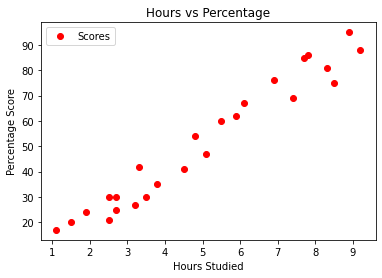

In [7]:
org_data.plot(x='Hours',y='Scores', style = 'ro')
plt.title('Hours vs Percentage')  
plt.xlabel('Hours Studied')  
plt.ylabel('Percentage Score')  
plt.show()

**From the above graph we can see that the realationship between the hours studied and the marks are directly proportional.**

## **Preparing the data**

Converting the data into attributes and labels

In [8]:
X = org_data.iloc[:,:-1].values #choosing all colums and last but one row
Y = org_data.iloc[:,1].values #extracting the Y axis values
print(X,Y)

[[2.5]
 [5.1]
 [3.2]
 [8.5]
 [3.5]
 [1.5]
 [9.2]
 [5.5]
 [8.3]
 [2.7]
 [7.7]
 [5.9]
 [4.5]
 [3.3]
 [1.1]
 [8.9]
 [2.5]
 [1.9]
 [6.1]
 [7.4]
 [2.7]
 [4.8]
 [3.8]
 [6.9]
 [7.8]] [21 47 27 75 30 20 88 60 81 25 85 62 41 42 17 95 30 24 67 69 30 54 35 76
 86]


Spliting the data into two- training and test data set using the *Scikit-Learn built-in method*

In [17]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.3,random_state=0)


## **Training**

Here we shall be using the Linear Regression algo to train

In [18]:
from sklearn.linear_model import LinearRegression
reggr=LinearRegression()
reggr.fit(X_train, Y_train)
print('Traning successful')

Traning successful


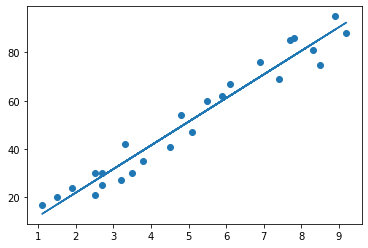

In [22]:
reg_line = reggr.coef_*X+reggr.intercept_ #reading the regression line

#plotting data by overlapping on the scattered data plot
plt.scatter(X,Y)
plt.plot(X,reg_line)
plt.show()

## **Predictions**
After training the model, we now make the predictions



In [39]:
#here we set 30% of the actual data for testing purpose
#print(X_test)
Y_pred= reggr.predict(X_test)#predicting the scores by passing the hours studied


Comparing the actual and predicted data

In [31]:
prd_data = pd.DataFrame({'Acutal data' : Y_test, 'Predicted data': Y_pred})
print(prd_data)

   Acutal data  Predicted data
0           20       17.053665
1           27       33.694229
2           69       74.806209
3           30       26.842232
4           62       60.123359
5           35       39.567369
6           24       20.969092
7           86       78.721636


**Testing the model with the data given**

In [44]:
#study hours per day
hours = [[9.25]]
q_pred = reggr.predict(hours)
print('Study hours: {}'.format(hours[0][0]))
print('Predicted Score: {}'.format(q_pred[0]))


Study hours: 9.25
Predicted Score: 92.91505723477056


## **Model Evaluation**
To find the performance of the model is crucial. There are various metrics to evaulate the model, here we have used the following

1.   Mean Absolute Error(MAE)
2.   Root Mean Square Error(RMSE)



In [47]:
from sklearn import metrics  
import math # to calculate RMS
print('Mean Absolute Error:', metrics.mean_absolute_error(Y_test, Y_pred)) 
print('Root Mean Square Error:', math.sqrt(metrics.mean_squared_error(Y_test, Y_pred)))

Mean Absolute Error: 4.419727808027651
Root Mean Square Error: 4.7921912746363144
